# Newton's method in $n$ dimensions

In [36]:
import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d

Here are two functions. The first one is an oblong "bowl-shaped" one made of quadratic functions.

In [37]:
def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2

def df(x):
    return np.array([x[0], 5*x[1]])

def ddf(x):
    return np.array([
                     [1,0],
                     [0,5]
                     ])

The second one is a challenge problem for optimization algorithms known as [Rosenbrock's banana function](https://en.wikipedia.org/wiki/Rosenbrock_function).

In [4]:

def f(X):
    x = X[0]
    y = X[1]
    val = 100.0 * (y - x**2)**2 + (1.0 - x)**2
    return val

def df(X):
    x = X[0]
    y = X[1]
    val1 = 400.0 * (y - x**2) * x - 2 * x
    val2 = 200.0 * (y - x**2)
    return np.array([val1, val2])

def ddf(X):
    x = X[0]
    y = X[1]
    val11 = 400.0 * (y - x**2) - 800.0 * x**2 - 2
    val12 = 400.0
    val21 = -400.0 * x
    val22 = 200.0
    return np.array([[val11, val12], [val21, val22]])

Let's take a look at these functions. First in 3D:

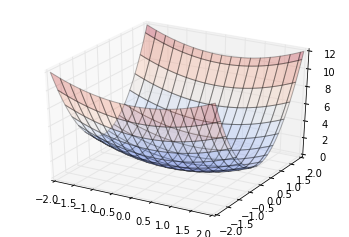

In [38]:
fig = pt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh,
                alpha=0.3, cmap=pt.cm.coolwarm, rstride=3, cstride=3)

Then as a "contour plot":

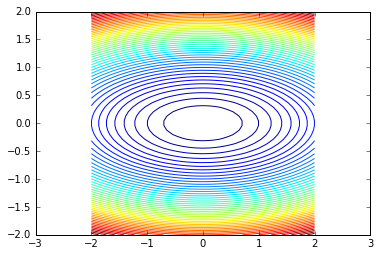

In [39]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 50)

* You may need to add contours to seee more detail.
* The function is *not* symmetric about the y axis!

### Newton

First, initialize:

In [44]:
guesses = [np.array([2, 2./5])]

Then evaluate this cell lots of times:

In [52]:
#clear
x = guesses[-1]
s = la.solve(ddf(x), df(x))
next_guess = x - s
print(f(next_guess), next_guess)

guesses.append(next_guess)

0.0 [ 0.  0.]


Here's some plotting code to see what's going on:

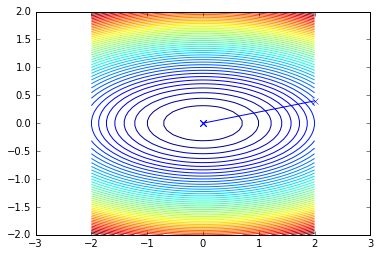

In [53]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "x-")

### For comparison: Conjugate Gradients ("CG") -- later in the class

Initialize the method:

In [54]:
x0 = np.array([2, 2./5])
#x0 = np.array([2, 1])

iterates = [x0]
gradients = [df(x0)]
directions = [-df(x0)]

Evaluate this cell many times in-place:

7.81186907775e-19


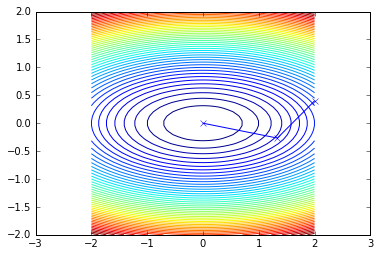

In [56]:
# Evaluate this cell many times in-place

x = iterates[-1]
s = directions[-1]

def f1d(alpha):
    return f(x + alpha*s)

alpha_opt = sopt.golden(f1d)
next_x = x + alpha_opt*s

g = df(next_x)
last_g = gradients[-1]
gradients.append(g)

beta = np.dot(g, g)/np.dot(last_g, last_g)
directions.append(-g + beta*directions[-1])

print(f(next_x))

iterates.append(next_x)

# plot function and iterates
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(iterates)
pt.plot(it_array.T[0], it_array.T[1], "x-")